# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 1 | remire-montjoly
Processing Record 4 of Set 1 | ji parana
City not found. Skipping...
Processing Record 5 of Set 1 | happy valley-goose bay
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | mendoza
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | al jawf
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | meadow lakes
Processing Record 13 of Set 1 | yuzha
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | hammerfest
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | devrek
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 

Processing Record 36 of Set 4 | la passe
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 39 of Set 4 | dzitbalche
Processing Record 40 of Set 4 | hafnarfjordur
Processing Record 41 of Set 4 | kristiansund
Processing Record 42 of Set 4 | cajabamba
Processing Record 43 of Set 4 | severo-yeniseyskiy
Processing Record 44 of Set 4 | utrik
Processing Record 45 of Set 4 | gofitskoye
Processing Record 46 of Set 4 | namsos
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | susuman
Processing Record 49 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 0 of Set 5 | iqaluit
Processing Record 1 of Set 5 | kirakira
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | esfarayen
Processing Record 5 of Set 5 | i-n-salah
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | amahai
Processing Record 8 

Processing Record 32 of Set 8 | yecla
Processing Record 33 of Set 8 | bayanhongor
Processing Record 34 of Set 8 | ruidoso
Processing Record 35 of Set 8 | abohar
Processing Record 36 of Set 8 | santa cruz
Processing Record 37 of Set 8 | salto
Processing Record 38 of Set 8 | malacky
Processing Record 39 of Set 8 | alghero
Processing Record 40 of Set 8 | ghadamis
Processing Record 41 of Set 8 | broken hill
Processing Record 42 of Set 8 | enewetak
Processing Record 43 of Set 8 | khorixas
Processing Record 44 of Set 8 | sa'dah
Processing Record 45 of Set 8 | rabigh
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | sokoni
Processing Record 48 of Set 8 | port macquarie
Processing Record 49 of Set 8 | genhe
Processing Record 0 of Set 9 | digapahandi
Processing Record 1 of Set 9 | kavieng
Processing Record 2 of Set 9 | arteche
Processing Record 3 of Set 9 | bosaso
Processing Record 4 of Set 9 | tarfaya
Processing Record 5 of Set 9 | salekhard
Processing Record 6 of Set 9 | m

Processing Record 23 of Set 12 | liezen
Processing Record 24 of Set 12 | arenapolis
Processing Record 25 of Set 12 | san juan
Processing Record 26 of Set 12 | basco
Processing Record 27 of Set 12 | grande prairie
Processing Record 28 of Set 12 | ciudad lazaro cardenas
Processing Record 29 of Set 12 | humaita
Processing Record 30 of Set 12 | selkirk
Processing Record 31 of Set 12 | rovnoye
Processing Record 32 of Set 12 | port-vila
Processing Record 33 of Set 12 | mugia
Processing Record 34 of Set 12 | zaozersk
Processing Record 35 of Set 12 | san matias
Processing Record 36 of Set 12 | kapa'a
Processing Record 37 of Set 12 | ain sefra
Processing Record 38 of Set 12 | galliano
Processing Record 39 of Set 12 | castillos
Processing Record 40 of Set 12 | zangguy
City not found. Skipping...
Processing Record 41 of Set 12 | ashburton
Processing Record 42 of Set 12 | kolondieba
Processing Record 43 of Set 12 | point vernon
Processing Record 44 of Set 12 | san sebastian de la gomera
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,11.67,90,100,5.85,RU,1689882314
1,remire-montjoly,4.9167,-52.2667,30.02,70,75,4.12,GF,1689882383
2,happy valley-goose bay,53.3168,-60.3315,24.17,43,75,6.17,CA,1689882261
3,bethel,41.3712,-73.4140,30.86,60,40,2.57,US,1689882377
4,mendoza,-32.8908,-68.8272,15.74,31,0,3.24,AR,1689882300


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,11.67,90,100,5.85,RU,1689882314
1,remire-montjoly,4.9167,-52.2667,30.02,70,75,4.12,GF,1689882383
2,happy valley-goose bay,53.3168,-60.3315,24.17,43,75,6.17,CA,1689882261
3,bethel,41.3712,-73.4140,30.86,60,40,2.57,US,1689882377
4,mendoza,-32.8908,-68.8272,15.74,31,0,3.24,AR,1689882300


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

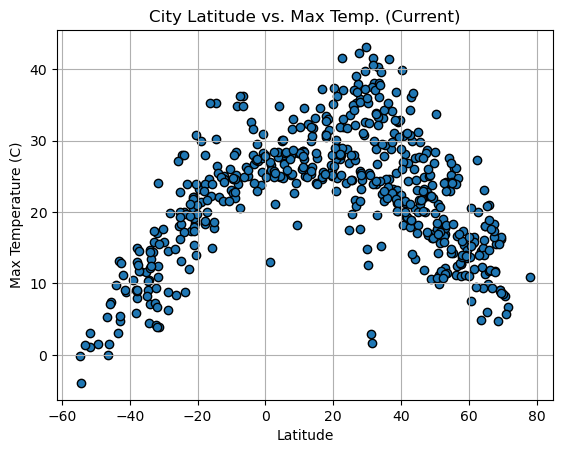

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temp. (Current)")  
plt.grid()
# Show plot
plt.show()

#### Latitude Vs. Humidity

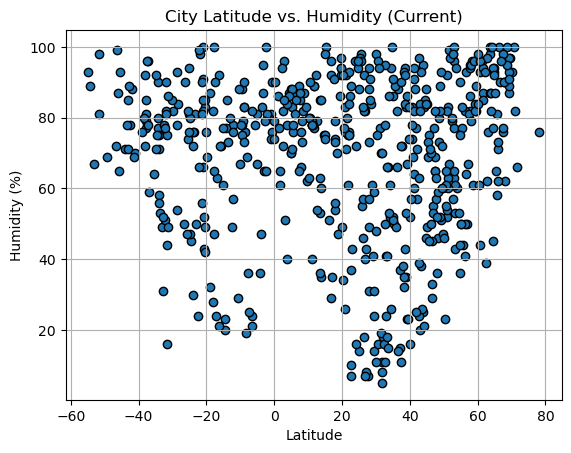

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (Current)")  
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

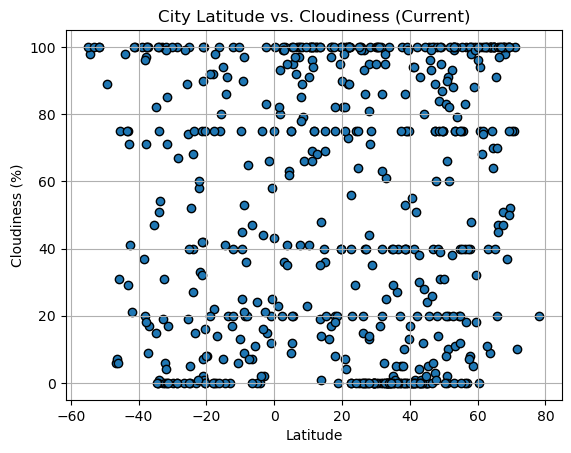

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (Current)")  
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

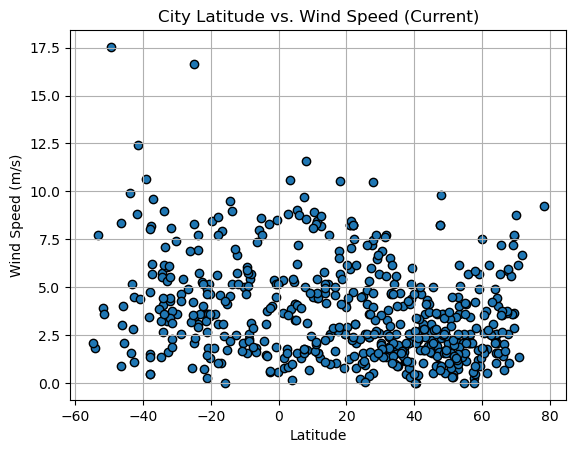

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (Current)")  
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def lin(x,y):
    return linregress(x,y)


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()
lin(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.2577642708235835, intercept=33.40428743298868, rvalue=-0.605578494586912, pvalue=6.85218578509736e-42, stderr=0.016873136356185266, intercept_stderr=0.7029894448824611)

In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,mendoza,-32.8908,-68.8272,15.74,31,0,3.24,AR,1689882300
6,grytviken,-54.2811,-36.5092,-3.93,89,98,1.84,GS,1689882237
11,adamstown,-25.0660,-130.1015,22.74,81,100,16.66,PN,1689882378
13,hermanus,-34.4187,19.2345,10.45,77,0,5.72,ZA,1689882385
16,kruisfontein,-34.0033,24.7314,7.16,71,1,2.66,ZA,1689882299


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.605578494586912


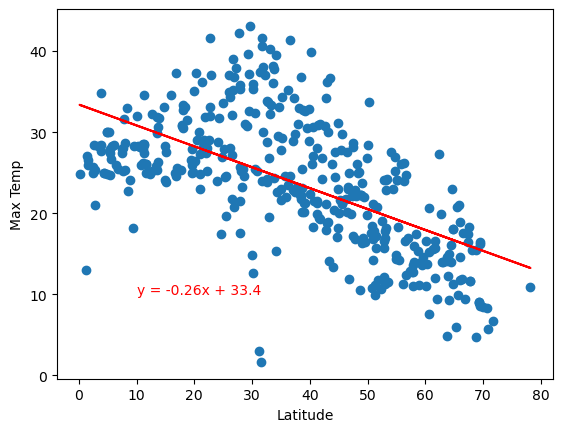

In [54]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(f"The r-value is: {rvalue}")

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,xy = (10,10),color='red')
plt.show()

The r-value is: 0.8624872919233336


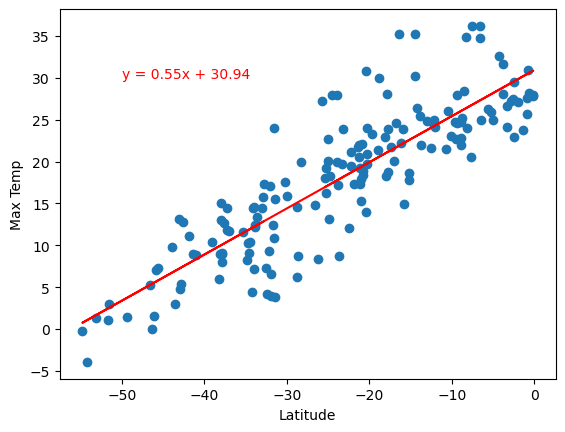

In [57]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(f"The r-value is: {rvalue}")

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,xy = (-50,30),color='red')

plt.show()

**Discussion about the linear relationship:** There are strong linear relaionship between Latitude and Temp.. For both realtionship in southern_hemi and northern_hemi, the closer the  Latitude is to 0, the high the Max Temp.. Which is true, the Equator(Latitude = 0) is the hottest area on the Earth.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08228761567522351


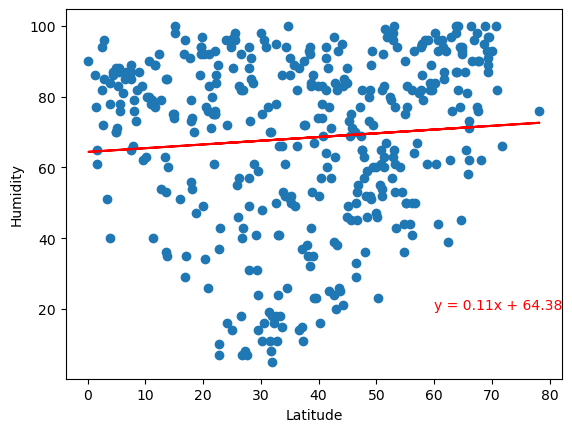

In [59]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The r-value is: {rvalue}")

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,xy = (60,20),color='red')
plt.show()

The r-value is: -0.16458194414480468


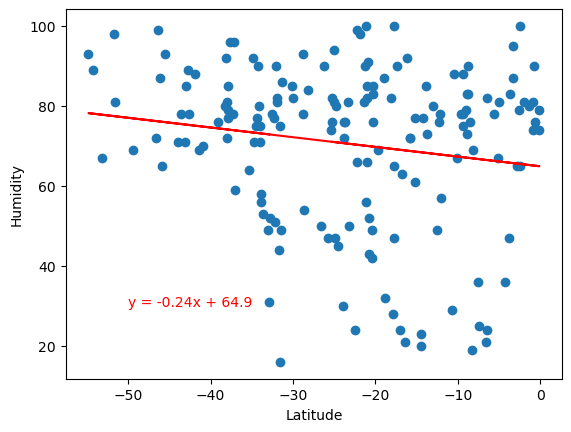

In [60]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"The r-value is: {rvalue}")

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,xy = (-50,30),color='red')

plt.show()

**Discussion about the linear relationship:** There does not show the strong relationship between Latitude and Humidity. In real world, the humidity has more relationship with the wind direction where can bring the water above oceans and lakes for each city.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.014348732333302784


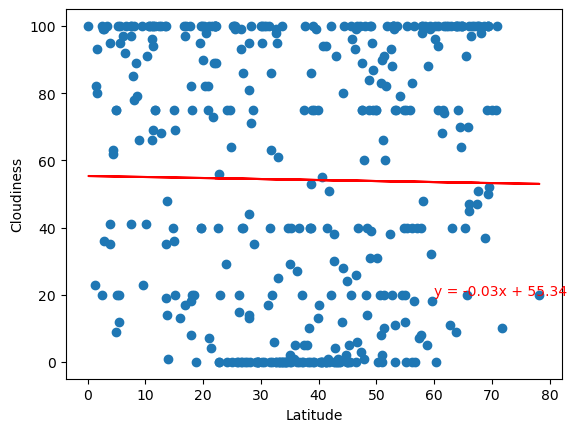

In [61]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(f"The r-value is: {rvalue}")

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,xy = (60,20),color='red')
plt.show()

The r-value is: -0.22712495559952198


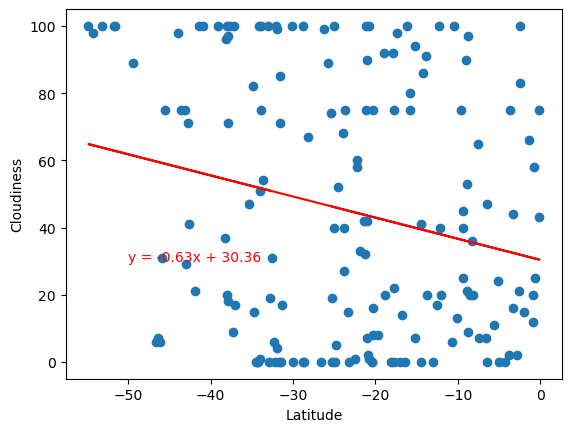

In [62]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
print(f"The r-value is: {rvalue}")

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,xy = (-50,30),color='red')

plt.show()

**Discussion about the linear relationship:** From the graph, there is no strong linear realtion between Cloudiness and Latitude on Northern Hemisphere, but Southern Hemisphere has a negative linear relation between them. The further the distance away from the equator, the higher the Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.19974645203845184


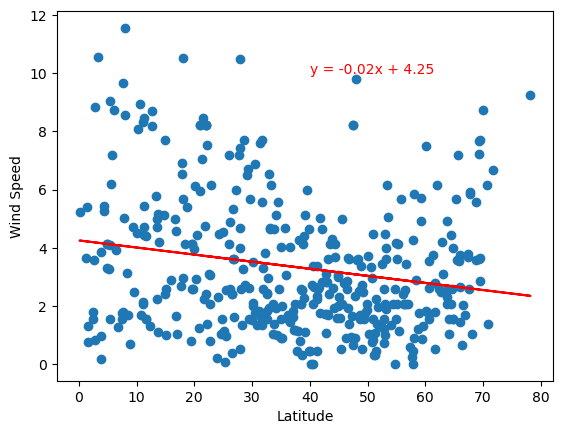

In [64]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"The r-value is: {rvalue}")

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,xy = (40,10),color='red')
plt.show()

The r-value is: -0.1223059747335293


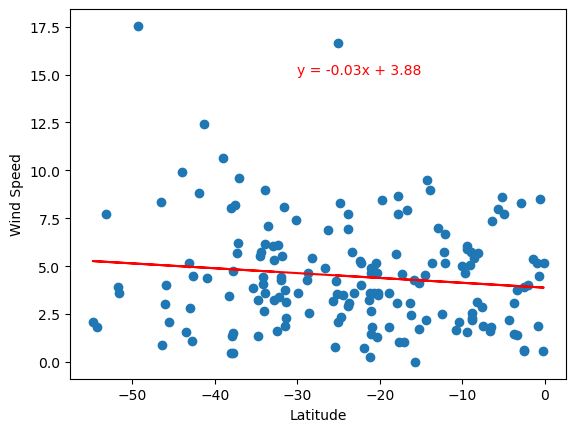

In [66]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(f"The r-value is: {rvalue}")

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,xy = (-30,15),color='red')

plt.show()

**Discussion about the linear relationship:** For both graph, it does not show the strong linear relationship between Latitude and wind Speed.